In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [12]:
dataframe = pd.read_csv("data.csv", sep=";")
dataframe = dataframe.dropna()

In [13]:
dataframe.head(10)
dataframe.describe()
dataframe.groupby("Salud_fetal").size()

Salud_fetal
1    1655
2     295
3     176
dtype: int64

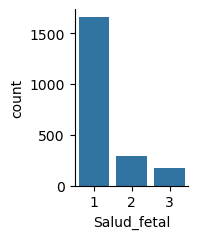

In [14]:
import seaborn as sb
sb.catplot(x = "Salud_fetal",data=dataframe,kind="count",height=2.5, aspect=.8)

In [15]:
label_encoder = LabelEncoder()
for column in dataframe.select_dtypes(include=['object']).columns:
    dataframe[column] = label_encoder.fit_transform(dataframe[column])

In [16]:
y = dataframe["Salud_fetal"]
x = dataframe.drop("Salud_fetal", axis=1)

In [17]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [18]:
df_balanceado = pd.DataFrame(x_resampled, columns=x.columns)
df_balanceado["Salud_fetal"] = y_resampled
df_balanceado.to_csv("DataSet_Salud_fetal_Balanceado.csv", sep=";", index=False)